# Notebook te execute tests

In [1]:
%load_ext autoreload
%autoreload 2

# The import statements
from test_scripts import *
from experimentRunner import ExperimentRunner
from algorithms import *
from pathlib import Path
from metric_learn import *
from operator import itemgetter

def ignore_warnings():
    import warnings
    warnings.simplefilter(action='ignore', category=FutureWarning)
    warnings.simplefilter(action='ignore', category=Warning)

ignore_warnings()

In [2]:
# The setup for the time management
import datetime
currentDate = datetime.date.today()
currentMonthName = currentDate.strftime("%B")
currentDay = currentDate.strftime("%d-%m")

from datetime import datetime

start_year = '2022/09/26'

# convert string to date object
d1 = datetime.strptime(start_year, "%Y/%m/%d")
d2 = datetime.strptime(str(currentDate), "%Y-%m-%d")

# difference between dates in timedelta
delta = d2 - d1
#print(f'Difference is {delta.days} days')

nbWeek = int(delta.days/7) + 1

import os
from pathlib import Path
path = Path('experimenten/' + currentMonthName + '/week' + str(nbWeek)).absolute()
CHECK_FOLDER = os.path.isdir(path)
if not CHECK_FOLDER:
    os.makedirs(path)
    print("created folder : ", path)

else:
    print(path, "folder already exists.")

created folder :  e:\Projecten\Unif_proj\ThesisCode\Testing\experimenten\November\week9


In [4]:
# Dictionary with all the algorithms, datasets and preprocessing 

datasets = dict()
path_data = Path('datasets/cobras-paper/').absolute()
dir_list = os.listdir(path_data)
for i in range(len(dir_list)):
    datasets[i + 1] = dir_list[i][:len(dir_list[i]) - 5]
print(datasets)

# algos = {
#     0: Cobras(),
#     1: SemiSupervised(),
#     2: Supervised(),
#     3: Preprocessed(),
#     4: PortionPreprocessed()
# }

ml_ss = {
    0: NCA(max_iter=100) # dees nog verder uitbereiden
}

ml_semi = {
    0: ITML()
}

{1: 'breast-cancer-wisconsin', 2: 'column_2C', 3: 'dermatology', 4: 'ecoli', 5: 'faces_expression_imagenet', 6: 'faces_eyes_imagenet', 7: 'faces_identity_imagenet', 8: 'faces_pose_imagenet', 9: 'glass', 10: 'hepatitis', 11: 'iris', 12: 'newsgroups_diff3', 13: 'newsgroups_sim3', 14: 'optdigits389_full', 15: 'parkinsons', 16: 'segmentation', 17: 'segmentation_training_only', 18: 'sonar', 19: 'spambase', 20: 'yeast'}


In [4]:
# Foldcreator

fold = 1
am = 10

if am:
    for i in range(am):
        print("Creating new fold to use in the experiments")
        for key, value in datasets.items():
            k = ExperimentRunner("Fold creator " + value , path, currentDay)
            fold = k.createFold(10, value)

## Effect of first training a metric on the trainingset or full set

[ 27.5   38.75  38.1   38.45  40.35  48.55  52.9   51.9   57.4   59.8 
  58.8   59.    59.15  54.7   57.45  56.65  66.7   64.45  68.15  64.9
  59.6   66.5   63.8   71.05  71.75  74.05  66.05  72.9   74.5   81.35
  76.65  75.6   69.6   73.9   69.85  83.15  86.    76.45  79.45  73.9
  90.    77.9   91.45  93.2  101.55  94.9   86.9   94.2   86.4   87.95
  89.05  96.9   92.3  100.85  90.05  97.45  97.85 103.6  103.95 102.
 110.7   99.1   96.05  91.85 106.25  97.75 103.7  102.65 102.65  93.9
  95.35  90.85  99.2  102.85 106.   110.4  114.    99.35  98.55 106.3
 108.7  118.9  110.45 100.15 108.05 117.75 102.3   86.75  96.25 111.35
 107.05 109.35 117.95  97.85 110.95 111.2  113.    75.05 103.65 114.5
 112.   113.3  117.45  93.65 116.7  111.1  113.75 115.05 108.85 119.25
 111.95 109.1  102.45 113.4  121.   112.7  130.65 112.45 125.2  126.2
 128.35 126.6  112.65 121.15 117.3  118.4  116.95 118.55 117.   126.2
 116.55 134.8  127.45 120.9  131.95 131.2  114.   124.1  133.45 121.35
 135.5  123.3  

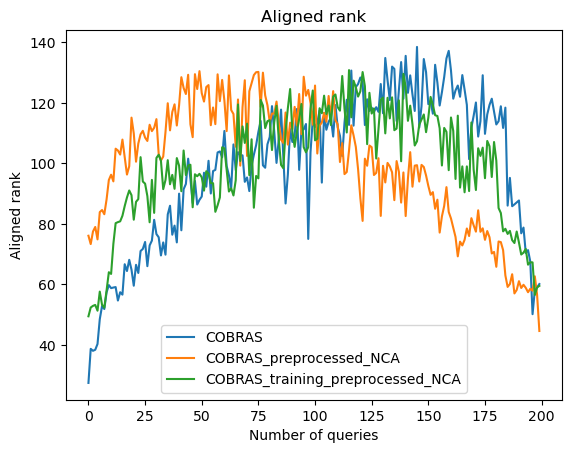

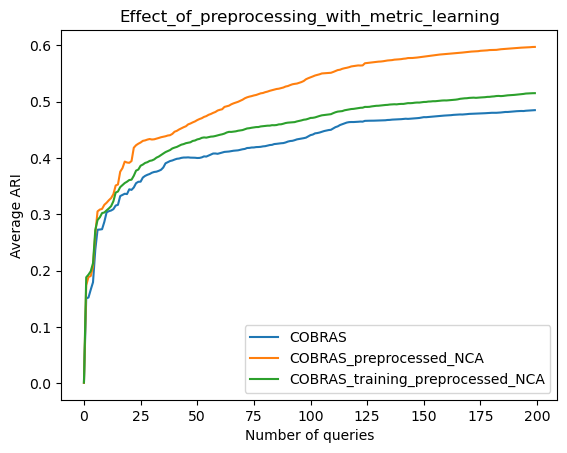

In [6]:
# %%capture
k = ExperimentRunner("Effect_of_preprocessing_with_metric_learning", path, currentDay, saveResults= True) # nog ARI berekenen
k.loadDataSets([]) # list(itemgetter(11, 10)(datasets)) to get specific datasets
k.addAlgo(list(itemgetter(0,3, 4)(algos)))
k.run(runsPQ= 10, maxQ=200, crossFold=fold, save=True)
full = k.makePlot(maxQ = 200, sortByAlgo=True, sortByDataset=False, seperate=False)
# seperate = k.makePlot(maxQ = 100, sortByAlgo=True, sortByDataset=False, seperate=True)
k.makeZip()

## Baseline

In [5]:
# %%capture
k = ExperimentRunner("Baseline_SemiSupervised", path, currentDay, saveResults= True)
k.loadDataSets([]) # list(itemgetter(11, 10)(datasets)) to get specific datasets
k.addAlgo([Cobras(), Supervised()])
k.run(runsPQ= 10, maxQ=200, crossFold=fold, save=True)
full = k.makePlot(maxQ = 200, sortByAlgo=True, sortByDataset=False, seperate=False, aligned=True)
# seperate = k.makePlot(maxQ = 200, sortByAlgo=True, sortByDataset=False, seperate=True)
k.makeZip()

NameError: name 'Supervised_NCA' is not defined

## Variance test

In [9]:
# variance test -> werkt gewoon met gemiddeldes I guess en geen crossfold
